To run this example locally, [install Ploomber](https://ploomber.readthedocs.io/en/latest/get-started/install.html) and execute: `ploomber examples -n templates/ml-basic`

To start a free, hosted JupyterLab: [![binder-logo](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ploomber/binder-env/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Fploomber%252Fprojects%26urlpath%3Dlab%252Ftree%252Fprojects%252Ftemplates/ml-basic%252FREADME.ipynb%26branch%3Dmaster)

Found an issue? [Let us know.](https://github.com/ploomber/projects/issues/new?title=templates/ml-basic%20issue)

Have questions? [Ask us anything on Slack.](https://ploomber.io/community/)


# Basic ML project

<!-- start description -->
Download data, clean it, generate features and train a model.
<!-- end description -->

## Description

Let's take a look at the `pipeline.yaml`:

```yaml
# Content of pipeline.yaml
# # enable client if you want to upload arfifacts to google cloud storage
# # see clients.py for details
# clients:
#   File:
#     dotted_path: clients.get_storage_client
#     run_id: '{{run_id}}'

tasks:
    # tasks.get, features and join are python functions
  - source: tasks.get
    product: output/get.parquet

  - source: tasks.features
    product: output/features.parquet

  - source: tasks.join
    product: output/join.parquet

    # fit.py is a script executed as a notebook
  - source: fit.py
    name: fit
    product:
        nb: output/nb.ipynb
        model: output/model.pickle

```

Note that the first three tasks as Python functions, while the last one is a
script.

Generate the plot:

In [1]:
%%bash
ploomber plot

Plot saved at: pipeline.png


/Users/Edu/dev/ploomber/src/ploomber/spec/dagspec.py:336: UserWarning: The following placeholders are declared in the environment but unused in the spec: {'run_id'}
  warnings.warn('The following placeholders are declared in the '
100%|██████████| 4/4 [00:00<00:00, 3902.59it/s]


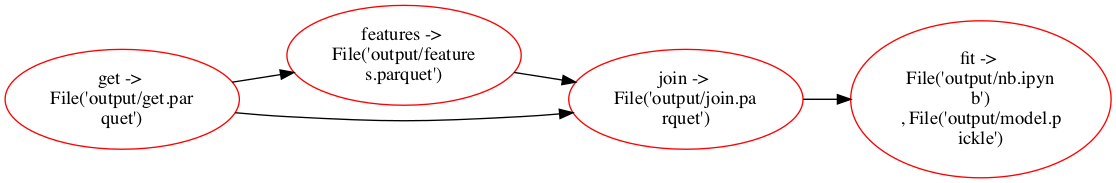

In [2]:
# If using jupyter, you can show the plot with this code:
from IPython.display import Image
Image(filename='pipeline.png')

# otherwise open the pipeline.png file directly

## Build pipeline

In [3]:
%%bash
ploomber build

name      Ran?      Elapsed (s)    Percentage
--------  ------  -------------  ------------
get       True         0.013125      0.243134
features  True         0.035538      0.658324
join      True         0.029991      0.555568
fit       True         5.3196       98.543


/Users/Edu/dev/ploomber/src/ploomber/spec/dagspec.py:336: UserWarning: The following placeholders are declared in the environment but unused in the spec: {'run_id'}
  warnings.warn('The following placeholders are declared in the '
Building task 'fit': 100%|██████████| 4/4 [00:18<00:00,  4.66s/it]


Since the training task is a script, it will generate a Jupyter notebook at
[output/nb.ipynb](output/nb.ipynb) with evaluation charts.

## Interacting with the pipeline

The command line interface is a convenient way to interact with your
pipeline. Try this in a terminal:

~~~bash
ploomber interact
~~~